# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">  Building Text-to-Speech Systems Using VITS & ArTST 
 </center>

Text-to-speech (TTS) is a technology that converts written text into spoken words. This task involves generating natural-sounding speech from text input, allowing computers to “read” text aloud.

However, in classification tasks, there is typically only one correct label, or sometimes a few. In automatic speech recognition (ASR), a single correct transcription corresponds to a given utterance.

However, there are countless ways to articulate the same sentence, with variations in voices, dialects, and speaking styles. Despite these challenges, some open-source models excel at this task. We will use two of them: the VITS pre-trained model from Kakao Enterprise to convert English text into speech, as well as the speecht5_tts_clartts_ar model from Mubazi to convert Arabic text into speech.

#### <a id="top"></a>
# <div style="box-shadow: rgb(60, 121, 245) 0px 0px 0px 3px inset, rgb(255, 255, 255) 10px -10px 0px -3px, rgb(31, 193, 27) 10px -10px, rgb(255, 255, 255) 20px -20px 0px -3px, rgb(255, 217, 19) 20px -20px, rgb(255, 255, 255) 30px -30px 0px -3px, rgb(255, 156, 85) 30px -30px, rgb(255, 255, 255) 40px -40px 0px -3px, rgb(255, 85, 85) 40px -40px; padding:20px; margin-right: 40px; font-size:30px; font-family: consolas; text-align:center; display:fill; border-radius:15px; color:rgb(60, 121, 245);"><b>Table of contents</b></div>

<div style="background-color: rgba(60, 121, 245, 0.03); padding:30px; font-size:15px; font-family: consolas;">
<ul>
    <li><a href="#1" target="_self" rel=" noreferrer nofollow">1. Setting up the Working Environment </a> </li>
    <li><a href="#2" target="_self" rel=" noreferrer nofollow">2. English Text to Speech using the VITS Model </a></li>
    <li><a href="#3" target="_self" rel=" noreferrer nofollow">3. Arabic Text to Speech using ArTST </a></li>
</ul>
</div>

***


<a id="1"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 1. Setting up the Working Environment </b></div>


Let’s start by setting up the working environments. First, we will download the packages we will use in this article. We will download the transformers package and the datasets packages from HuggingFace to be able to download the model and the dataset we will work with.

In [1]:
!pip install transformers -q
!pip install -U datasets -q
!pip install timm -q
!pip install inflect -q
!pip install phonemizer -q
!pip install gtts -q

Now that the packages and libraries we will use are ready, let's import them:

In [2]:
from transformers import pipeline
from datasets import load_dataset
from IPython.display import Audio as IPythonAudio
import soundfile as sf
import torch 

You can check the **[text-to-speech model](https://huggingface.co/models?pipeline_tag=text-to-speech)** hub on Hugging Face so you can the model that is suitable for your system:

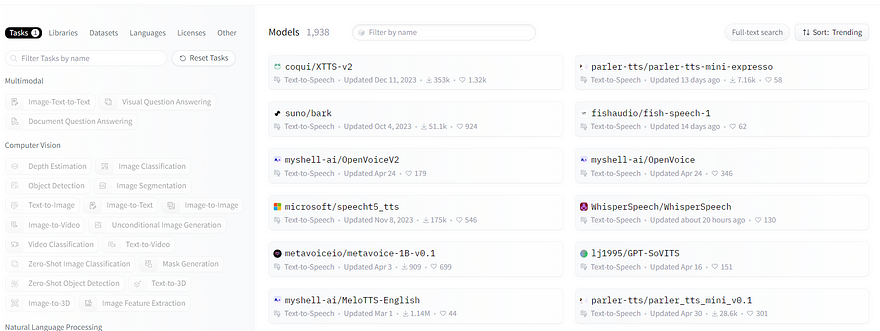


<a id="2"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 2. English Text to Speech using the VITS Model </b></div>


**[Variational Inference with adversarial learning for end-to-end Text-to-Speech (VITS)](https://github.com/jaywalnut310/vits)** is an end-to-end speech synthesis model that predicts a speech waveform conditional on an input text sequence. It is a conditional variational autoencoder (VAE) comprised of a posterior encoder, decoder, and conditional prior.

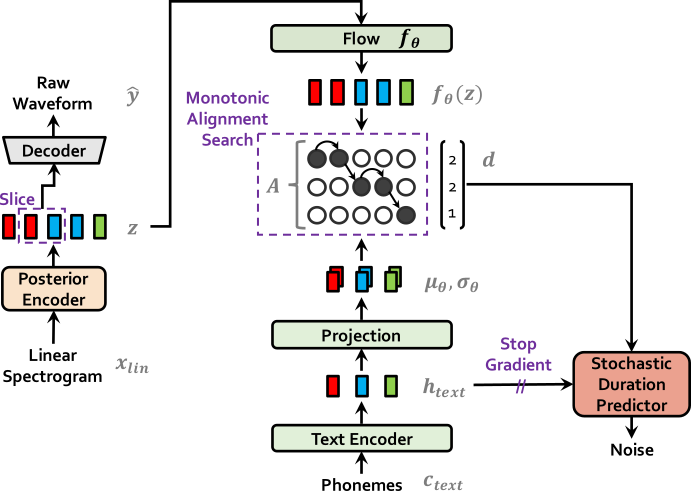

A set of spectrogram-based acoustic features is predicted by the flow-based module, which is formed of a Transformer-based text encoder and multiple coupling layers.

The spectrogram is decoded using a stack of transposed convolutional layers, much in the same style as the HiFi-GAN vocoder. Motivated by the one-to-many nature of the TTS problem, where the same text input can be spoken in multiple ways, the model also includes a stochastic duration predictor, which allows the model to synthesize speech with different rhythms from the same input text.

The model is trained end-to-end with a combination of losses derived from variational lower bound and adversarial training. To improve the expressiveness of the model, normalizing flows are applied to the conditional prior distribution.
During inference, the text encodings are up-sampled based on the duration prediction module and then mapped into the waveform using a cascade of the flow module and HiFi-GAN decoder.

Due to the stochastic nature of the duration predictor, the model is non-deterministic and thus requires a fixed seed to generate the same speech waveform.

There are two variants of the VITS model: one is trained on the LJ Speech dataset, and the other is trained on the VCTK dataset. LJ Speech dataset consists of 13,100 short audio clips of a single speaker with a total length of approximately 24 hours.
The VCTK dataset consists of approximately 44,000 short audio clips uttered by 109 native English speakers with various accents. The total length of the audio clips is approximately 44 hours.

To use the VITS model to convert text to speech, we will utilize the Hugging Face pipeline to perform text-to-speech (TTS) using a specific model stored locally (./models/kakao-enterprise/vits-ljs).

The text provided, which discusses the Israeli occupation of Palestine, is passed to the narrator pipeline. The pipeline converts the text into speech, generating audio that narrates the provided text.

The result, stored in the narrated_text variable contains the audio data produced by the model. This allows for the text to be listened to as spoken words, facilitating the accessibility and auditory presentation of the information.

In [3]:
from gtts import gTTS
from IPython.display import Audio

text = """
The Israeli occupation of Palestine began in 1967 
during the Six-Day War when Israel captured the West Bank, 
Gaza Strip, and East Jerusalem. 
These areas, home to many Palestinians, have since been a 
focal point of conflict. The international community generally views Israeli settlements there as illegal. 
Efforts towards peace continue, with Palestinians seeking 
independence and Israelis seeking security. 
The situation remains highly complex and contentious.
"""

# Convert the text to speech
tts = gTTS(text)
tts.save("narrated_text.mp3")

# Play the audio
Audio("narrated_text.mp3", autoplay=True)

<a id="3"></a>
# <div style="box-shadow: rgba(0, 0, 0, 0.16) 0px 1px 4px inset, rgb(51, 51, 51) 0px 0px 0px 3px inset; padding:20px; font-size:32px; font-family: consolas; text-align:center; display:fill; border-radius:15px;  color:rgb(34, 34, 34);"> <b> 3.Arabic Text to Speech using ArTST </b></div>


ArTST is a pre-trained Arabic text and speech transformer that supports open-source speech technologies for the Arabic language. The model architecture in this first edition follows the unified-modal framework, SpeechT5, that was recently released for English and is focused on Modern Standard Arabic (MSA), with plans to extend the model for dialectal and code-switched Arabic in future editions.

The model is pre-trained from scratch on MSA speech and text data and fine-tuned for the following tasks: Automatic Speech Recognition (ASR), TTS, and spoken dialect identification. SpeechT5 for Arabic (TTS task) is a pre-trained weight from ArTST and fine-tuned using the huggingface implementation of SpeechT5 on Classical Arabic ClArTTS for speech synthesis (text-to-speech).
To use this model to convert text to speech we will use the Hugging Face pipeline to perform a text-to-speech (TTS) task with a specific model (MBZUAI/speecht5_tts_clartts_ar).

We will also load speaker embeddings from a dataset (herwoww/arabic_xvector_embeddings) and selects a particular embedding to 
simulate a specific speaker's voice.

The selected text, which describes the Israeli occupation of Palestine, is converted to speech using this embedding. The generated speech audio is then saved to a file called "speech.wav" with the specified sample rate. The TTS model generates speech without diacritics, focusing on the natural pronunciation of the text.

In [4]:
synthesiser = pipeline("text-to-speech", "MBZUAI/speecht5_tts_clartts_ar")

embeddings_dataset = load_dataset("herwoww/arabic_xvector_embeddings", split="validation")
speaker_embedding = torch.tensor(embeddings_dataset[105]["speaker_embeddings"]).unsqueeze(0)
# You can replace this embedding with your own as well.
text = """
بدأ الاحتلال الإسرائيلي لفلسطين في عام 1967 خلال حرب الأيام الستة عندما 
احتلت إسرائيل الضفة الغربية وقطاع غزة والقدس الشرقية. أصبحت هذه المناطق، التي يعيش فيها العديد من الفلسطينيين، محورًا للصراع منذ ذلك الحين. 
يرى المجتمع الدولي عمومًا أن المستوطنات الإسرائيلية هناك غير قانونية. 
تستمر الجهود نحو السلام، حيث يسعى الفلسطينيون إلى الاستقلال ويسعى الإسرائيليون إلى الأمن. 
لا تزال القضية معقدة للغاية ومثيرة للجدل.
"""
speech = synthesiser(text, forward_params={"speaker_embeddings": speaker_embedding})
# ArTST is trained without diacritics.

sf.write("speech.wav", speech["audio"], samplerate=speech["sampling_rate"])

config.json:   0%|          | 0.00/2.17k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/578M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/322 [00:00<?, ?B/s]

spm_char.model:   0%|          | 0.00/403k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/96.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/458 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/50.7M [00:00<?, ?B/s]

README.md:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/979k [00:00<?, ?B/s]

Generating validation split:   0%|          | 0/305 [00:00<?, ? examples/s]